In [4]:
import random_graph
import subprocess
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import random

def random_matrix(number, path, max_len = 100):
    result = []

    for _ in range(number):
        result.append(["0"] * number)

    for i in range(number):
        for j in range(number):
            if i == j:
                continue

            result[i][j] = str(random.randint(1, max_len))
            result[j][i] = result[i][j]

    with open(path, 'w', encoding='utf-8') as file:
        file.write("\n".join(",".join(row) for row in result))

In [55]:
def run_command(command):
    output = subprocess.run(command.split(" "), stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True) 
    return output.stdout.decode('utf-8')

ga_exec = "../cmake-build-release-gccg/sizeThreadTest.exe"
# abs_exec = "../"
gen_nums = [1, 10, 20, 50, 100, 200, 500, 700, 1000]
node_nums = [10, 25, 50, 70, 100, 200, 500, 700, 1000]
repetitions = 10

path = "../data/temp_graph.csv"

# test_ga.exe path gen_num  => time dist
# held_carp.exe path        => time dist
# gen_data[node_nums][den_nums]
gen_data = {nodes : {gens : {"time": 0.0, "dist": 0.0} for gens in gen_nums} for nodes in node_nums}

for node in node_nums:
    print("nodes: " + str(node))
    for _ in range(repetitions):
        random_matrix(node, path)
        
        # command = abs_exec + " " + path
        # abs_res = float(run_command(command).split("\r\n")[1])
        for gen in gen_nums:
            command = ga_exec + " " + path + " " + str(gen) + " " + str(8)
            res = run_command(command)
            time, dist = res.split("\r\n")[:2]
            # print(str(gen) + ":\t" + str(dist))
            gen_data[node][gen]["dist"] += float(dist)
            gen_data[node][gen]["time"] += float(time)
    
    for gen in gen_nums:
        gen_data[node][gen]["dist"] /= repetitions
        gen_data[node][gen]["time"] /= repetitions

nodes: 10
nodes: 25
nodes: 50
nodes: 70
nodes: 100
nodes: 200
nodes: 500
nodes: 700
nodes: 1000


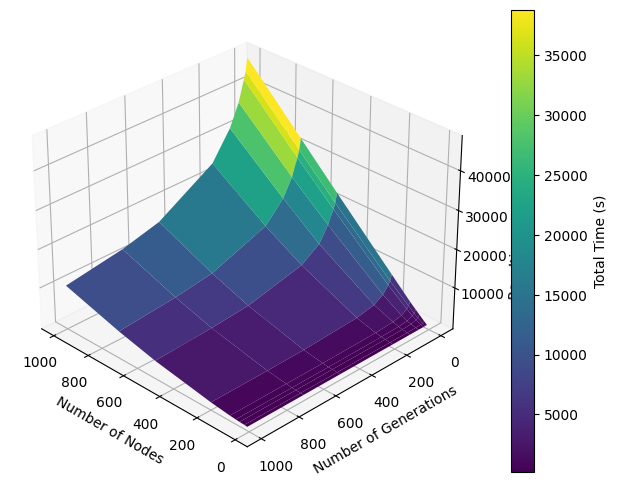

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create meshgrid for X and Y
X, Y = np.meshgrid(node_nums, gen_nums)

# Calculate Z values (total time)
Z = np.zeros_like(X, dtype=float)
for i, gen in enumerate(gen_nums):
    for j, node in enumerate(node_nums):
        Z[i, j] = gen_data[node][gen]["dist"]
        # Z[i, j] = gen_data[node][gen]["time"]

# Plotting the 3D graph
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, label='Total Time (s)')

# Set labels and title
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Generations')
ax.set_zlabel('Resulting Distance')

ax.view_init(azim=135)
# ax.view_init(azim=90, elev=0)
# ax.set_title('Total Time for Indexing and Merging with Varying Threads')

plt.show()

C:\Users\lviv1\AppData\Local\Temp\ipykernel_25144\3166738309.py:36: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  a.set_ylim(0, 80)
C:\Users\lviv1\AppData\Local\Temp\ipykernel_25144\3166738309.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


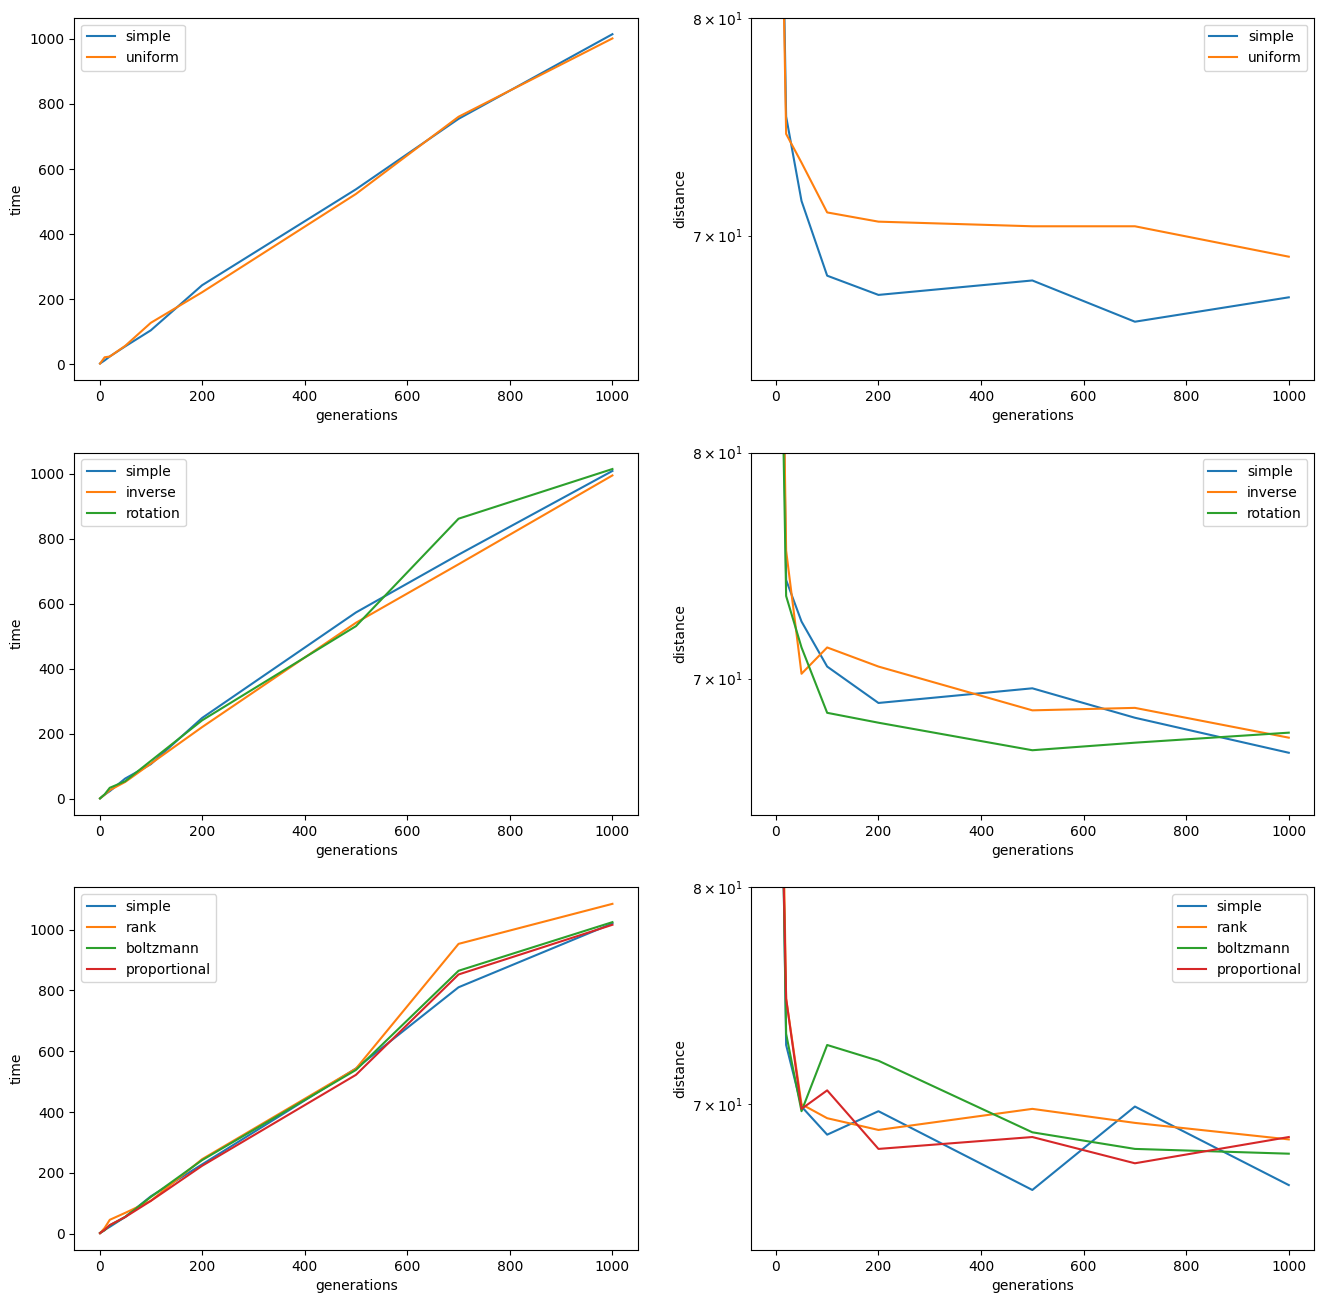

In [65]:
temp = {"crossover" : {"simple": {"time" : None, "result": None},
                       "uniform" : {"time" : None, "result": None}},
        "mutation" : {"simple": {"time" : None, "result": None},
                      "inverse": {"time" : None, "result": None},
                      "rotation": {"time" : None, "result": None}},
        "selection" : {"rank": {"time" : None, "result": None},
                       "boltzmann" : {"time" : None, "result": None},
                       "proportional" : {"time" : None, "result": None},
                       "simple" : {"time" : None, "result": None}}}

func = "crossover"
type = "simple"


data = [cell[func][type]["time"] for cell in gen_data]

figure, axis = plt.subplots(3, 2)
# figure, axis = plt.subplot_mosaic([['crossover time)', 'crossover result)'], ['mutation time)', 'mutation result)'], ['selection time)', 'selection result)']],
                            #   layout='constrained')
figure.set_figheight(16)
figure.set_figwidth(16)
for type in ["simple", "uniform"]:
    axis[0, 0].plot(gen_nums, [cell["crossover"][type]["time"] for cell in gen_data], label = type)
    axis[0, 1].plot(gen_nums, [cell["crossover"][type]["res"] for cell in gen_data], label = type)

for type in ["simple", "inverse", "rotation"]:
    axis[1, 0].plot(gen_nums, [cell["mutation"][type]["time"] for cell in gen_data], label = type)
    axis[1, 1].plot(gen_nums, [cell["mutation"][type]["res"] for cell in gen_data], label = type)

for type in ["simple", "rank", "boltzmann", "proportional"]:
    axis[2, 0].plot(gen_nums, [cell["selection"][type]["time"] for cell in gen_data], label = type)
    axis[2, 1].plot(gen_nums, [cell["selection"][type]["res"] for cell in gen_data], label = type)

for a in axis.ravel()[1::2]: 
    a.set_yscale('log')
    a.set_ylim(0, 80)
    a.set_ylabel("distance")

for a in axis.ravel()[::2]:
    a.set_ylabel("time")

for a in axis.ravel():
    a.set_xlabel("generations")
    a.legend()

figure.show()